In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [36]:
df=pd.read_csv('/Social_Network_Ads.csv')

In [37]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [39]:
# 2. Preprocess (assume last column is target, and skip 'User ID')
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']



In [41]:
# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# 4. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
x=df.drop(columns=['TenYearCHD'])
y=df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
# 5. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
# 6. Predictions
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

In [45]:
# 7. Evaluate Model
print("=== Evaluation ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))


=== Evaluation ===
Confusion Matrix:
 [[50  2]
 [ 9 19]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

Accuracy: 0.8625
Precision: 0.9047619047619048
Recall: 0.6785714285714286
ROC-AUC: 0.9684065934065934


In [46]:
# 8. Threshold Tuning
print("\n=== Threshold Tuning ===")
thresholds = [0.3, 0.5, 0.7]
for t in thresholds:
    y_custom = (y_probs >= t).astype(int)
    acc = accuracy_score(y_test, y_custom)
    prec = precision_score(y_test, y_custom)
    rec = recall_score(y_test, y_custom)
    print(f"Threshold {t:.1f} → Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")


=== Threshold Tuning ===
Threshold 0.3 → Accuracy: 0.8750, Precision: 0.7812, Recall: 0.8929
Threshold 0.5 → Accuracy: 0.8625, Precision: 0.9048, Recall: 0.6786
Threshold 0.7 → Accuracy: 0.8250, Precision: 1.0000, Recall: 0.5000


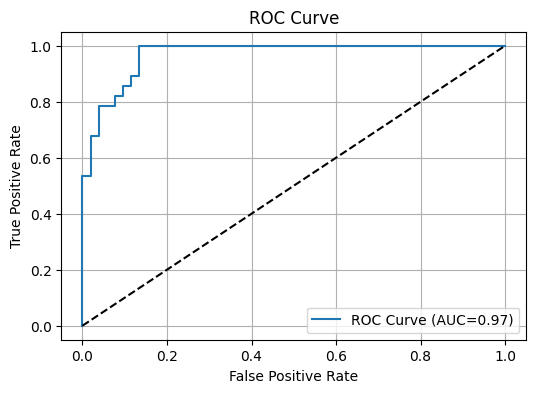

In [47]:
# 9. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


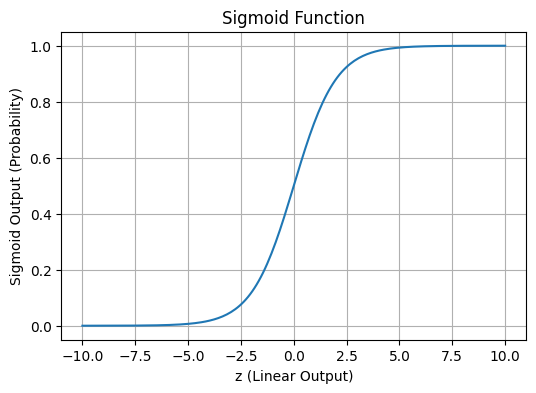

In [48]:
# 10. Visualize Sigmoid Function
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(6,4))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z (Linear Output)")
plt.ylabel("Sigmoid Output (Probability)")
plt.grid()
plt.show()